In [ ]:
seaborn.lineplot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

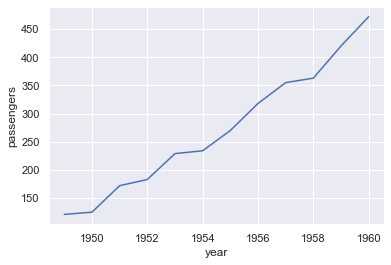

In [4]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")


In [5]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year', ylabel='May'>

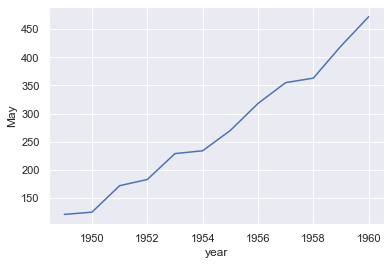

In [6]:
sns.lineplot(data=flights_wide["May"])

<AxesSubplot:xlabel='year'>

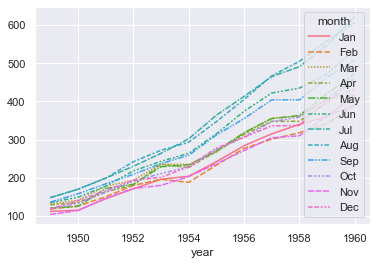

In [7]:
sns.lineplot(data=flights_wide)

<AxesSubplot:xlabel='year', ylabel='passengers'>

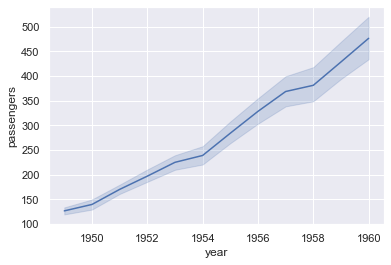

In [8]:
# Passing the entire dataset in long-form mode will aggregate
# over repeated values (each year) to show the mean and 95% confidence interval:

sns.lineplot(data=flights, x="year", y="passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

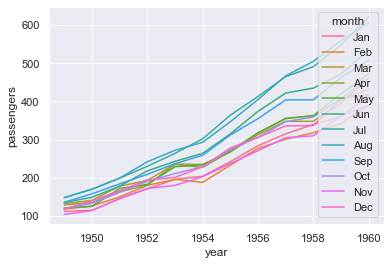

In [9]:
# Assign a grouping semantic (hue, size, or style) to plot separate lines

sns.lineplot(data=flights, x="year", y="passengers", hue="month")

<AxesSubplot:xlabel='year', ylabel='passengers'>

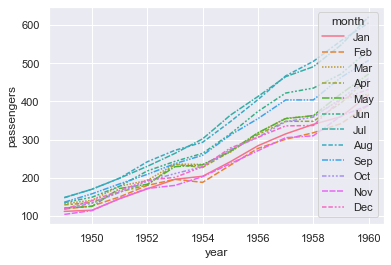

In [10]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month")

In [11]:
# Each semantic variable can also represent a different column.
# For that, we’ll need a more complex dataset:

fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event")

In [ ]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

In [ ]:
# Show error bars instead of error bands and
# plot the 68% confidence interval (standard error):

sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", ci=68
)

In [ ]:
# Assigning the units variable will plot multiple lines without
# applying a semantic mapping:

sns.lineplot(
    data=fmri.query("region == 'frontal'"),
    x="timepoint", y="signal", hue="event", units="subject",
    estimator=None, lw=1,
)

In [ ]:
# Load another dataset with a numeric grouping variable:

dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

In [ ]:
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice",
)

In [ ]:
sns.lineplot(
    data=dots.query("coherence > 0"),
    x="time", y="firing_rate", hue="coherence", style="choice",
     palette="flare", hue_norm=mpl.colors.LogNorm(),
)

In [ ]:
palette = sns.color_palette("mako_r", 6)
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    hue="coherence", style="choice",
    palette=palette
)

In [ ]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    legend="full"
)

In [ ]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    sizes=(.25, 2.5)
)

<AxesSubplot:>

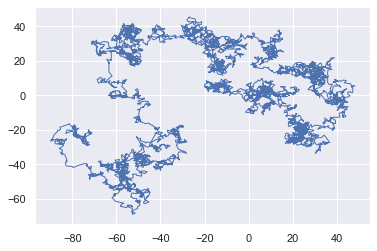

In [12]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)